In [21]:
# Importing hte required libraries
import pandas as pd
import matplotlib.pyplot as plt


# Reading the data

In [4]:
# Read the csv file using 'read_csv'
bigmart = pd.read_csv("C:/Users/user/Desktop/ml/data sheet/Train.csv")

In [9]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Inspecting the data frame

In [10]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Droping the unwanted columns

In [11]:
bigmart.drop('Item_Identifier',axis=1,inplace=True) #droping the column

In [12]:
bigmart.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

# EDA

In [13]:
bigmart.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [15]:
bigmart.isnull().sum() #shows the na value ie not available value in the data

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet_Size column having na values. For this we have to drop it or use imputation

In [18]:
#dropping the na value row
bigmart_nona = bigmart.dropna()

In [20]:
 # checking any other na value is there or not
bigmart_nona.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

NO na values

Imputation for Item_Weight column and Outlet_Size column

<function matplotlib.pyplot.show(close=None, block=None)>

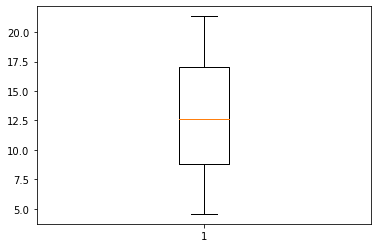

In [23]:
#to find the outlier use box plot
plt.boxplot(bigmart_nona.Item_Weight) 
plt.show

No outlayer found so for imputation mean will be used

In [24]:
#using mean for imputation
bigmart.Item_Weight.fillna(bigmart_nona.Item_Weight.mean(),inplace = True)

In [26]:
bigmart.isnull().sum() # no na values in Item_Weight column

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
#imputation for Outlet_Size column
print(bigmart["Outlet_Size"]) #its a discrete data 

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [28]:
bigmart.Outlet_Size.unique()  #shows the unique values

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [29]:
bigmart.Outlet_Size.value_counts() # no of each unique value

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* The mode is max no of unique value ie here the 'Medium'
* Here we can replace the na values by the Medium but it will make the data wrong so 
* we will replace by a name 'others'

In [31]:
bigmart.Outlet_Size.fillna("others",inplace=True) #imputing na values with 'others'

In [32]:
bigmart.Outlet_Size.value_counts() # to see na value replaced or not

Medium    2793
others    2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
bigmart.isnull().sum() # no na values 

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# FEATURE ENGINEERING

we have to check for every column unique values. There are some data entry error like same thing in abbribation or in small lettor or capital letter. for which it shows no of unique values for same thing . we have to make it one by replace()

# analysing the Item_Fat_content column

In [35]:
bigmart.Item_Fat_Content.unique() #finding unique values

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
 # replacing values
bigmart.Item_Fat_Content = bigmart.Item_Fat_Content.str.replace("LF","Low Fat").replace("reg","Regular")

In [38]:
bigmart.Item_Fat_Content.unique()  # checking unique value

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [40]:
bigmart.Item_Fat_Content.value_counts() # checking no of unique values

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

# analysing the Item_Visibility column

*In this column item visibility meanse probability of visibility of the item in bigmart but 0 item visibiity 
is not possible so we replace the zero with madian.


In [43]:
bigmart.Item_Visibility.describe()
bigmart.Item_Visibility = bigmart.Item_Visibility.replace(0,bigmart.Item_Visibility.median())
bigmart.Item_Visibility

0       0.016047
1       0.019278
2       0.016760
3       0.053931
4       0.053931
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [44]:
# analysing the Item_Type column
bigmart.Item_Type.unique()
bigmart.Item_Type.value_counts()  # all values are ok 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

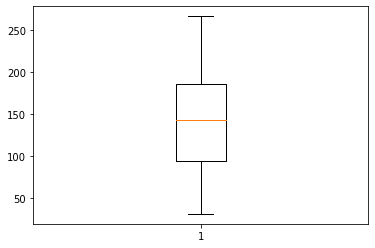

In [46]:
## analysing the Item_MRP column
# in it no na value we already checked 
plt.boxplot(bigmart.Item_MRP) # no out layer found # good to go
plt.show

In [47]:
## analysing the Outlet_Identifier column
#we dont need this column for prediction so we drop the column
bigmart.drop('Outlet_Identifier',axis=1,inplace=True)

In [49]:
bigmart.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [50]:
## analysing the Outlet_Location_Type column
bigmart.Outlet_Location_Type.unique()
# here no unique values found  so good to go

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [51]:
## analysing the Outlet_Type column
bigmart.Outlet_Type.unique()
# here no repetetion ie unique values found  so good to go

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [52]:
## analysing the Item_Outlet_Sales column
# here no na values found  so good to go

# Conclusion

All columns are free from na values and imputation is done for all unique values